# ABOUT


Datascientest's Datascientist continuous bootcamp - cohorte Mars2022 -  AeroBOT project

**Tutor**

* Alban THUET

**Authors:**

* Hélène ASSIR
* Hichem HADJI  
* [Ioannis STASINOPOULOS](https://www.linkedin.com/in/ioannis-stasinopoulos/)

</br>

---
</br>

**Version History**

Version | Date       | Author(s)  | Modification
--------|----------- | ---------  | --------------------------
X.X     | XX/XX/2022 | A.B        | modif
1.0     | 17/09/2022 | I.S        | Document creation

* Load y_pred_proba and y_test 
* Plot probability distribution plots

# IMPORT PACKAGES


settings for  full / patial Narrative display. Helene?


In [98]:
#######################
# Import packages
#######################
import numpy as np
import seaborn as sns
import math # for math.pi etc.
import time # time code execution

#######################
# Pandas
#######################
import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("display.colheader_justify","left") # left-justify the print output of pandas

### Display full columnwidth
# Set pandas settings to display full text columns
#pd.options.display.max_colwidth = None
# Restore pandas settings to display standard colwidth
pd.reset_option('display.max_colwidth')

import itertools # Pour créer des iterateurs

# Package to show the progression of pandas operations
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()
# simply use .progress_apply() instead of .apply() on your pd.DataFram

######################
# PLOTTING
######################
import matplotlib.pyplot as plt
%matplotlib inline
# Define global plot parameters for better readability and consistency among plots
# A complete list of the rcParams keys can be retrieved via plt.rcParams.keys() function
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rc('legend', fontsize=23)    # legend fontsize

# BOKEH 
from bokeh.plotting import figure # Importation de la classe figure qui permet de créer un graphique bokeh.
from bokeh.io import  push_notebook, output_notebook, show
output_notebook() # permet d'afficher tous les futurs graphiques dans l'output d'une cellule jupyter. Si cette instruction n'est pas lancée, la figure s'affichera dans un nouvel onglet.
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.models.tools import HoverTool

#####################
# NLP 
#####################
import re # for Regular Expression handling
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') # WordNet lemmatizer
nltk.download('omw-1.4') # necessary for WordNet lemmatizer
from nltk.tokenize import word_tokenize # Usual tokenizer
from nltk.tokenize import TweetTokenizer # Special tokenizer;  "we'll", "didn't", etc. are considered as one word
from sklearn.feature_extraction.text import CountVectorizer # Vectorization
from nltk.corpus import stopwords # Import stopwords from nltk.corpus
from nltk.stem.snowball import EnglishStemmer

###############################
# ML preprocessing and models
###############################
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble # random forest
from sklearn.svm import SVC

# EVALUATION tools from sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, multilabel_confusion_matrix, average_precision_score, precision_recall_curve, PrecisionRecallDisplay

###############################
# Deep Learning
###############################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras import callbacks


###############################
# Other
###############################
import pickle as pkl # Saving data externally

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Mount GDrive

In [99]:
#@title
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#check your present working directory 
%pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'/content/drive/My Drive/data/saved models/Yannis/BERT/7_3_9_3_UNfrozen_2022_09_14'

In [100]:
#@title
# move to the transformed data location (you can create a deeper structure, if needed, e.g. to save a trained model):
%cd /content/drive/MyDrive/data/transformed/

/content/drive/MyDrive/data/transformed


In [101]:
#@title
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

 2022_09_11_7_4_3_raw_narr_BERT_BASE_frozen_max_length_345.pkl
 complaints-2022-08-05_13_55.csv
'Copy of Qualified abbreviations_20220718.xlsx.gsheet'
'Data Dictionnary.xlsx'
 data_for_BERT_multilabel_20220805.pkl
 logs
 model.png
 model_results
 Narrative_PP_stemmed_24072022_TRAIN.pkl
 Narrative_Raw_Stemmed_24072022_TRAIN.pkl
 Narrative_RegEx_subst_21072022_TRAIN.pkl
'Qualified abbreviations_20220707_test.csv'
'Qualified abbreviations_20220708.csv'
'Qualified abbreviations_20220718.csv'
'Qualified abbreviations_20220718_Google_sheet.gsheet'
 test_data_final.pkl
 train_data_final.pkl


# Define functions


In [102]:
def get_filenames_in_dir(dir, extension = '.pkl', include_path = False):
  '''
  Find all .pkl (or other format's) files in the directory and create a list with their names
  
  Input: 
  - directory
  - file extension type
  - include_path: whether to include the entire path in the filename; default: False
  
  Return:
  - list of .pkl
  '''
  import os
  files_to_import = []
  # traverse whole directory
  for root, dirs, files in os.walk(dir):
      # select file name
      for file in files:
          # check the extension of files
          if file.endswith(extension):
            if include_path == True:
              files_to_import.append(os.path.join(root, file)) # print whole path of files
            else:  
              files_to_import.append(os.path.join('', file))
  
  return files_to_import

In [103]:
def y_prob_to_y_pred_ML(y_pred_proba, threshold = 0.5):
  """
  Converts probabilities into 0's and 1's. We are still in the MULTILABEL context.
  Input: MULTILABEL predictions (probabilities whose sum for each sample may exceed > 1) coming directly from the model
  Using a user-defined threshold, return a MULTILABEL prediction vector 'y_pred' containing 0's and 1's
  """
  y_pred=[]
  for sample in y_pred_proba:
    y_pred.append([1 if i>= threshold else 0 for i in sample])
  y_pred = np.array(y_pred)

  return y_pred

In [104]:
def create_clf_rep_dict_from_saved_y_test_y_pred_proba2(dir, threshold = 0.5):
  '''
  - Load y_test and y_pred_proba from their respective .pkl files, located in dir
  - Calculate y_pred from y_pred_proba using the function y_prob_to_y_pred_ML()
  - Create a classification report

  Return a classification report 'clf_rep' in dictionnary format.
  Return also y_test, y_pred_proba, y_pred
  '''

  # Import DataFrames into a list 'files_to_import'
  %cd $dir
  # the '$' extracts the value from the string. Don't put any comments in the line above

  files_to_import = get_filenames_in_dir(dir, extension = '.pkl', include_path = False)

  print('\nFiles found:')
  for filename in files_to_import:
    print(filename)

  # Load y_test
  filename = files_to_import[1]
  with open(filename, "rb") as f:
    y_test = pkl.load(f)

  # Load y_pred_proba
  filename = files_to_import[2]
  with open(filename, "rb") as f:
    y_pred_proba = pkl.load(f)

  # Calculate y_pred given a specific threshold
  y_pred = y_prob_to_y_pred_ML(y_pred_proba, threshold = threshold)

  anomalies = ['Anomaly_Aircraft Equipment', 
              'Anomaly_Airspace Violation',
              'Anomaly_ATC Issue', 
              'Anomaly_Flight Deck / Cabin / Aircraft Event',
              'Anomaly_Conflict', 
              'Anomaly_Deviation - Altitude',
              'Anomaly_Deviation - Speed', 
              'Anomaly_Deviation - Track / Heading',
              'Anomaly_Deviation / Discrepancy - Procedural',
              'Anomaly_Ground Excursion', 
              'Anomaly_Ground Incursion',
              'Anomaly_Ground Event / Encounter',
              'Anomaly_Inflight Event / Encounter',
              'Anomaly_No Specific Anomaly Occurred']
  # I got this list from df.columns
  # 14 labels

  clf_rep = classification_report(y_test, y_pred, output_dict = True)
  print(f"\n\n Classification Report: \n {classification_report(y_test, y_pred, target_names = anomalies)}\n")

  return clf_rep, y_test, y_pred_proba, y_pred

# Load y_pred_proba, y_test

In [105]:
# Call the function
experiment_name = '2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR'
dir = '/content/drive/MyDrive/data/saved models/Yannis/BERT/' + experiment_name

# Calculate classification report and y_pred, for a given threshold
clf_rep, y_test, y_pred_proba, y_pred = create_clf_rep_dict_from_saved_y_test_y_pred_proba2(dir, threshold = 0.5)

/content/drive/MyDrive/data/saved models/Yannis/BERT/2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR

Files found:
2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR.pkl
y_test_2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR.pkl
y_pred_proba_2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR.pkl
clf_rep_2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR.pkl
clf_rep_df_2022_09_12_7_5_4_avant_dernier_layer_Flatten_frozen_large_LR.pkl


 Classification Report: 
                                               precision    recall  f1-score   support

                  Anomaly_Aircraft Equipment       0.00      0.00      0.00      7666
                  Anomaly_Airspace Violation       0.00      0.00      0.00       804
                           Anomaly_ATC Issue       0.00      0.00      0.00      3165
Anomaly_Flight Deck / Cabin / Aircraft Event       0.00      0.00      0.00      1515
                            Anomaly_Conflict     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [106]:
y_pred_proba.mean(axis = 0)

array([0.39391834, 0.04161116, 0.16237219, 0.06469741, 0.15895171,
       0.09206736, 0.02688367, 0.07983397, 0.6211135 , 0.02114675,
       0.05653191, 0.07165545, 0.18646833, 0.00447863], dtype=float32)

In [107]:
np.array(y_test).mean(axis = 0)

array([0.39519538, 0.04144757, 0.16316115, 0.07810084, 0.17857511,
       0.08928756, 0.02706465, 0.08299825, 0.60062893, 0.0225281 ,
       0.05546964, 0.07650273, 0.17708011, 0.00644396])

# Study the probabilities

In [108]:
  anomalies = ['Anomaly_Aircraft Equipment', 
              'Anomaly_Airspace Violation',
              'Anomaly_ATC Issue', 
              'Anomaly_Flight Deck / Cabin / Aircraft Event',
              'Anomaly_Conflict', 
              'Anomaly_Deviation - Altitude',
              'Anomaly_Deviation - Speed', 
              'Anomaly_Deviation - Track / Heading',
              'Anomaly_Deviation / Discrepancy - Procedural',
              'Anomaly_Ground Excursion', 
              'Anomaly_Ground Incursion',
              'Anomaly_Ground Event / Encounter',
              'Anomaly_Inflight Event / Encounter',
              'Anomaly_No Specific Anomaly Occurred']

In [109]:
# DataFrame ontaining the predicted probability and y_test for each Anomaly

# DataFrame containing the predicted probability for each Anomaly
# Create columns
col_names = []
for anomaly in anomalies:
  col_names.append('prob_' + anomaly)
# Write data into df
pred_prob_df = pd.DataFrame(y_pred_proba, columns = col_names)

# DataFrame containing y_test data
y_test_df = pd.DataFrame(y_test, columns = anomalies)

# Join the 2 DataFrames
df_for_catplot = y_test_df.join(pred_prob_df)

In [110]:
pred_prob_df.head(3)

,prob_Anomaly_Aircraft Equipment,prob_Anomaly_Airspace Violation,prob_Anomaly_ATC Issue,prob_Anomaly_Flight Deck / Cabin / Aircraft Event,prob_Anomaly_Conflict,prob_Anomaly_Deviation - Altitude,prob_Anomaly_Deviation - Speed,prob_Anomaly_Deviation - Track / Heading,prob_Anomaly_Deviation / Discrepancy - Procedural,prob_Anomaly_Ground Excursion,prob_Anomaly_Ground Incursion,prob_Anomaly_Ground Event / Encounter,prob_Anomaly_Inflight Event / Encounter,prob_Anomaly_No Specific Anomaly Occurred
0,0.393836,0.041607,0.162403,0.064699,0.158975,0.092074,0.02688,0.079833,0.621196,0.021143,0.056542,0.071659,0.186445,0.004479
1,0.393836,0.041607,0.162403,0.064699,0.158975,0.092074,0.02688,0.079833,0.621196,0.021143,0.056542,0.071659,0.186445,0.004479
2,0.393836,0.041607,0.162403,0.064699,0.158975,0.092074,0.02688,0.079833,0.621196,0.021143,0.056542,0.071659,0.186445,0.004479


In [111]:
df_for_catplot.head(2)

,Anomaly_Aircraft Equipment,Anomaly_Airspace Violation,Anomaly_ATC Issue,Anomaly_Flight Deck / Cabin / Aircraft Event,Anomaly_Conflict,Anomaly_Deviation - Altitude,Anomaly_Deviation - Speed,Anomaly_Deviation - Track / Heading,Anomaly_Deviation / Discrepancy - Procedural,Anomaly_Ground Excursion,Anomaly_Ground Incursion,Anomaly_Ground Event / Encounter,Anomaly_Inflight Event / Encounter,Anomaly_No Specific Anomaly Occurred,prob_Anomaly_Aircraft Equipment,prob_Anomaly_Airspace Violation,prob_Anomaly_ATC Issue,prob_Anomaly_Flight Deck / Cabin / Aircraft Event,prob_Anomaly_Conflict,prob_Anomaly_Deviation - Altitude,prob_Anomaly_Deviation - Speed,prob_Anomaly_Deviation - Track / Heading,prob_Anomaly_Deviation / Discrepancy - Procedural,prob_Anomaly_Ground Excursion,prob_Anomaly_Ground Incursion,prob_Anomaly_Ground Event / Encounter,prob_Anomaly_Inflight Event / Encounter,prob_Anomaly_No Specific Anomaly Occurred
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.393836,0.041607,0.162403,0.064699,0.158975,0.092074,0.02688,0.079833,0.621196,0.021143,0.056542,0.071659,0.186445,0.004479
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.393836,0.041607,0.162403,0.064699,0.158975,0.092074,0.02688,0.079833,0.621196,0.021143,0.056542,0.071659,0.186445,0.004479


## Heatmap

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


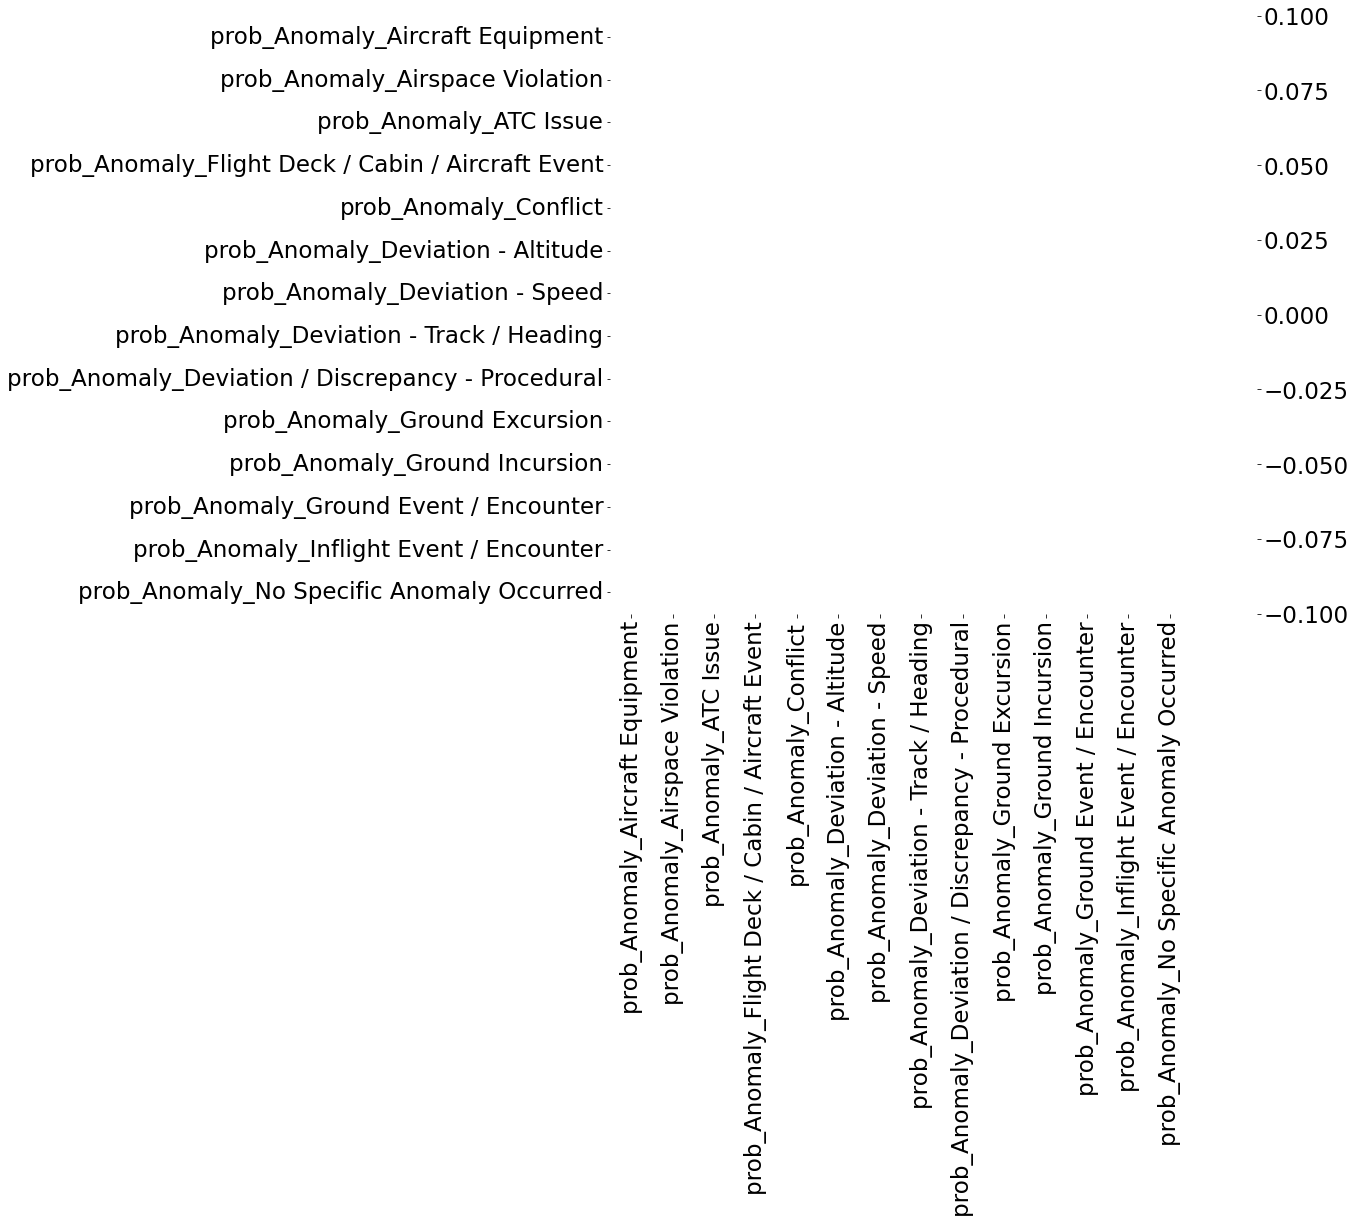

In [112]:
# col_names = []
# for anomaly in anomalies:
#   col_names.append('prob_' + anomaly)
# pred_prob_df = pd.DataFrame(y_pred_proba, columns = col_names)

# Plot heatmap
plt.figure(figsize=(13, 11))
sns.heatmap(pred_prob_df.corr(), annot=True, cmap='RdBu_r', center=0);

## Probability distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density e

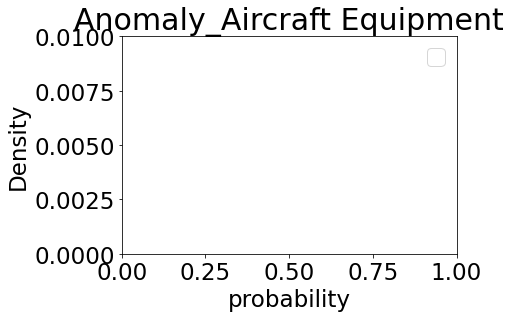

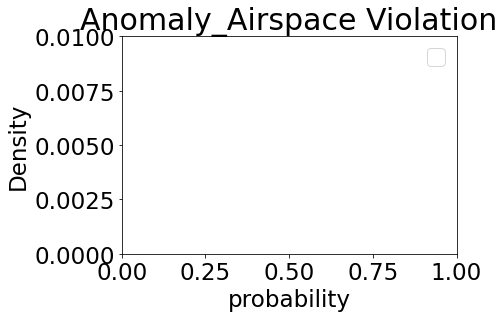

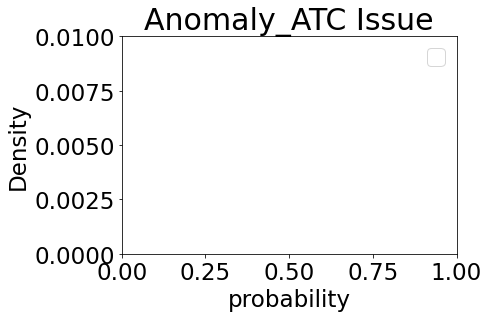

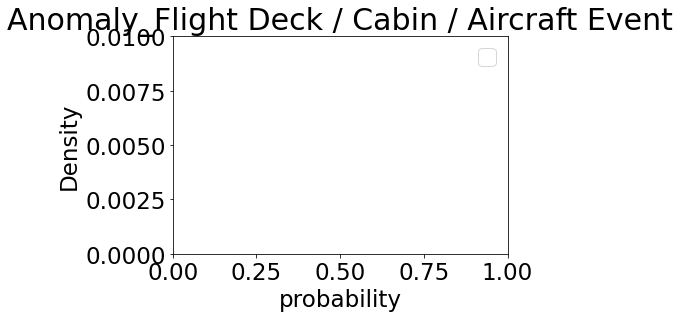

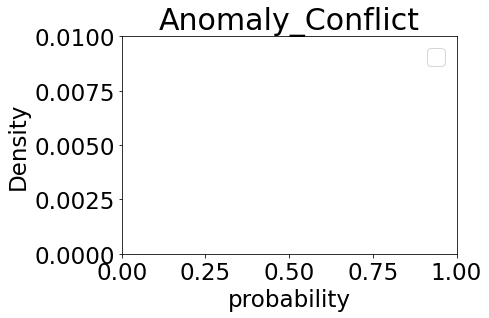

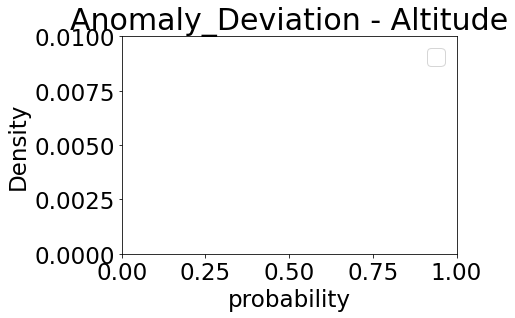

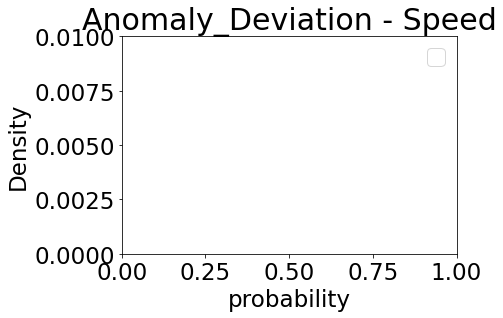

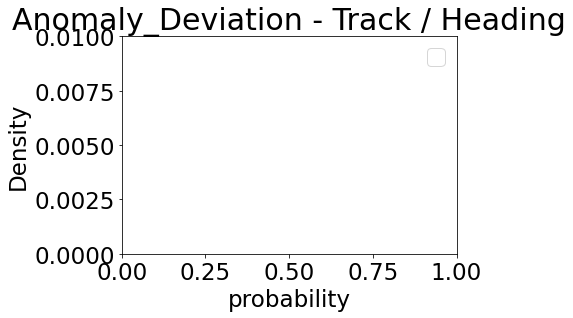

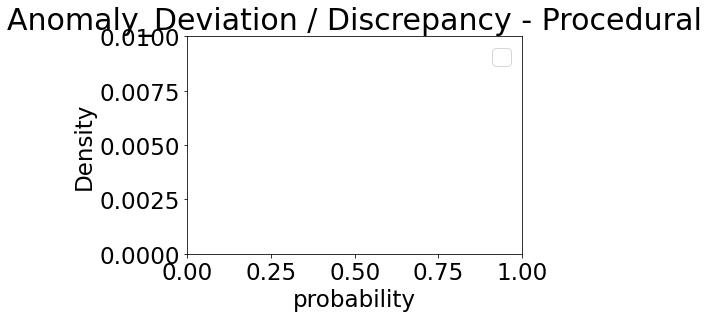

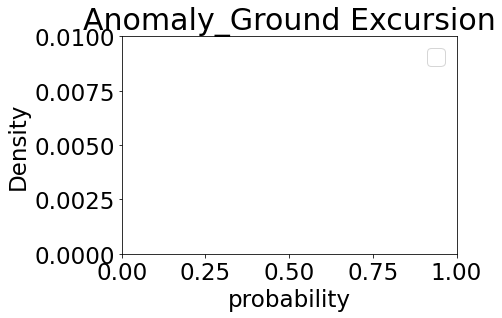

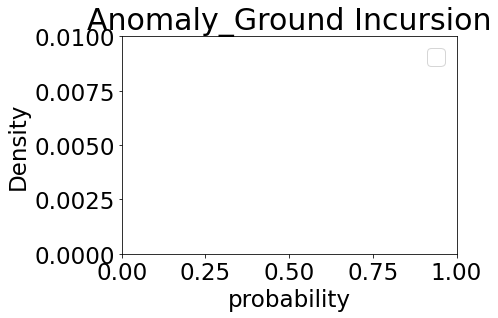

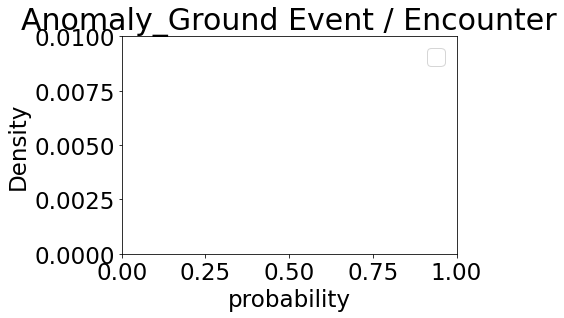

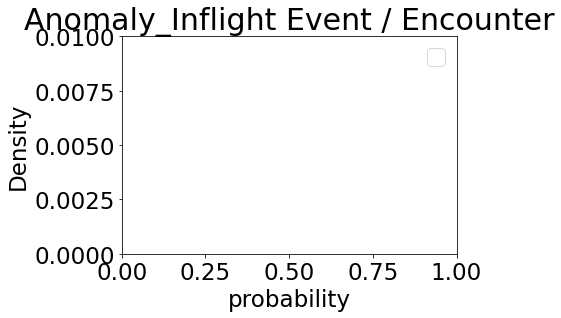

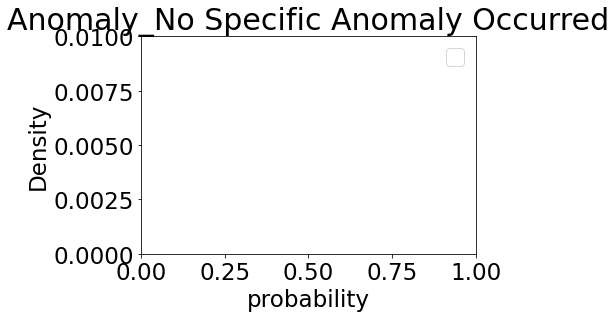

In [119]:
# Plot probability distributions
for anomaly in anomalies:
  plt.figure()
  name1 = 'prob_' + anomaly
  sns.kdeplot(df_for_catplot[name1], hue = df_for_catplot[anomaly], shade=False)
  plt.xlabel('probability')
  plt.legend(['1', '0'])
  plt.ylim([0,1])
  plt.title(anomaly);

## Metrics

In [114]:
len(y_test)

19398

In [115]:
metrics.accuracy_score(y_test, y_pred)
# accuracy evaluates whether all the 14-class predictions are correct or not; it is not label-based

0.07088359624703577

In [116]:
metrics.precision_score(y_test, y_pred, average = None)
# This is the same as the 1st column of the classification report
# The options average = 'micro', average = 'macro' return the 'micro avg' and 'macro avg' for precision, like in the classification report

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.60062893, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

## Multilabel Confusion matrix

In [117]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[11732,     0],
        [ 7666,     0]],

       [[18594,     0],
        [  804,     0]],

       [[16233,     0],
        [ 3165,     0]],

       [[17883,     0],
        [ 1515,     0]],

       [[15934,     0],
        [ 3464,     0]],

       [[17666,     0],
        [ 1732,     0]],

       [[18873,     0],
        [  525,     0]],

       [[17788,     0],
        [ 1610,     0]],

       [[    0,  7747],
        [    0, 11651]],

       [[18961,     0],
        [  437,     0]],

       [[18322,     0],
        [ 1076,     0]],

       [[17914,     0],
        [ 1484,     0]],

       [[15963,     0],
        [ 3435,     0]],

       [[19273,     0],
        [  125,     0]]])

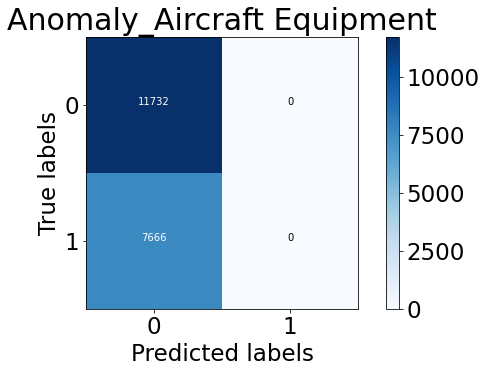

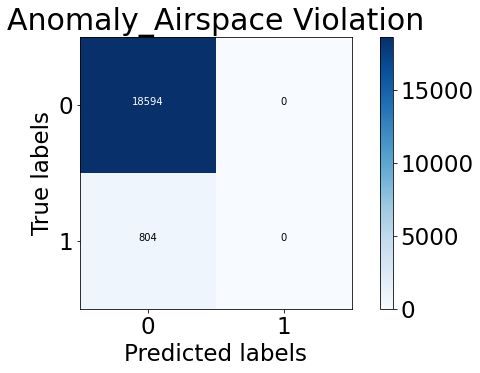

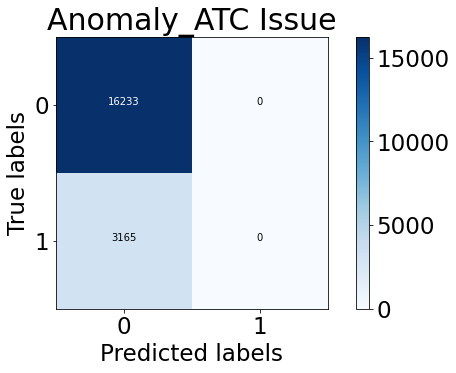

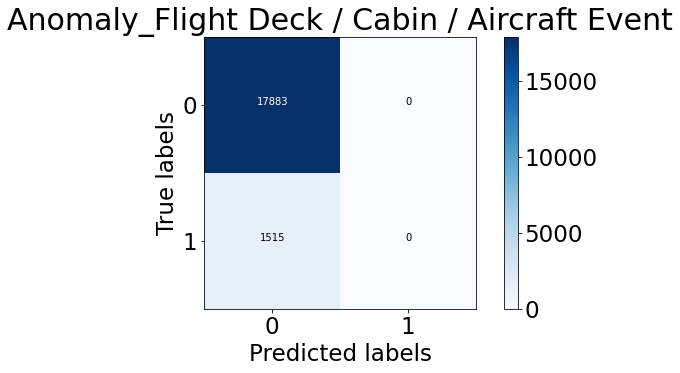

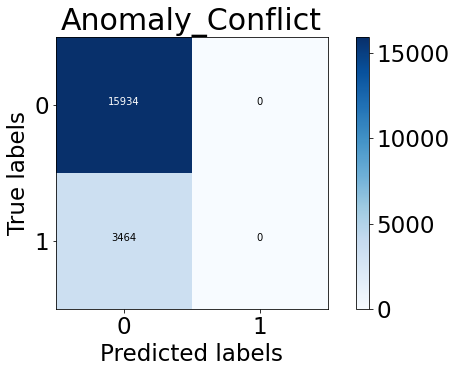

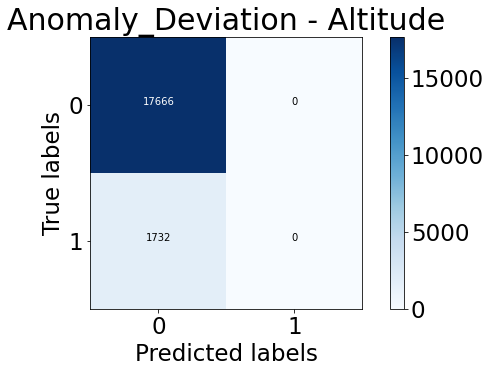

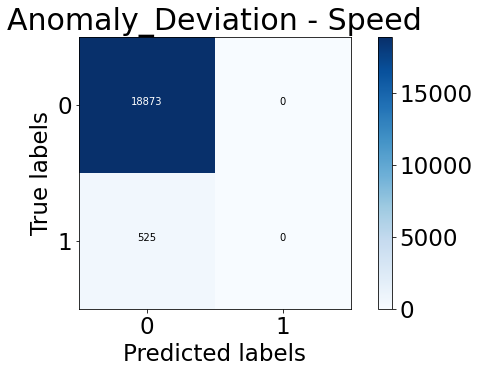

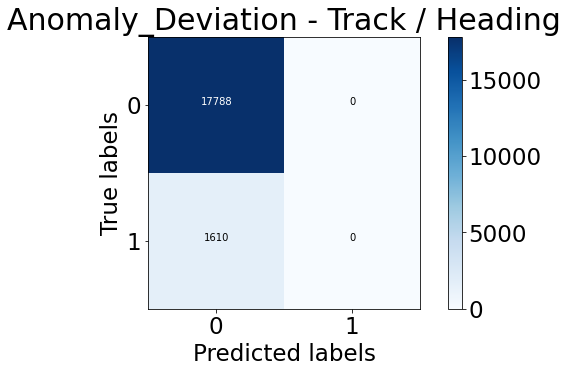

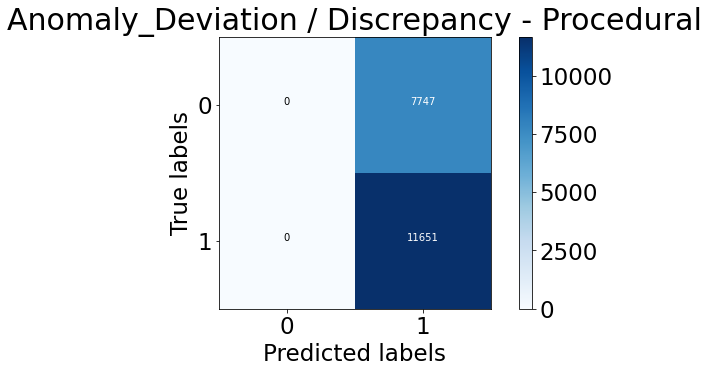

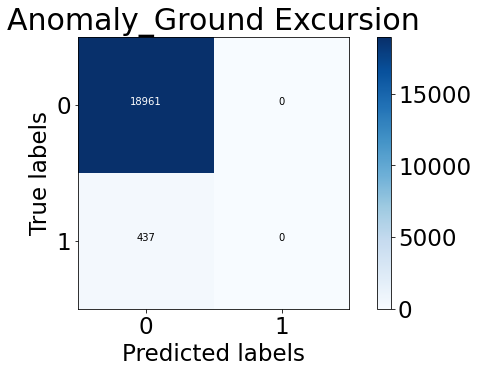

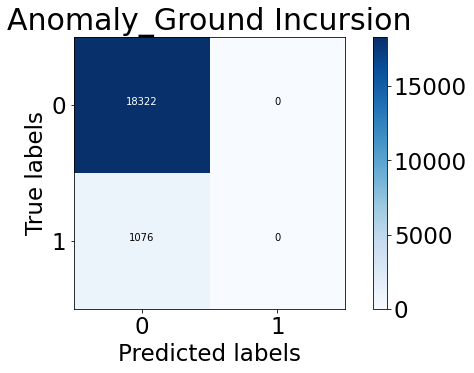

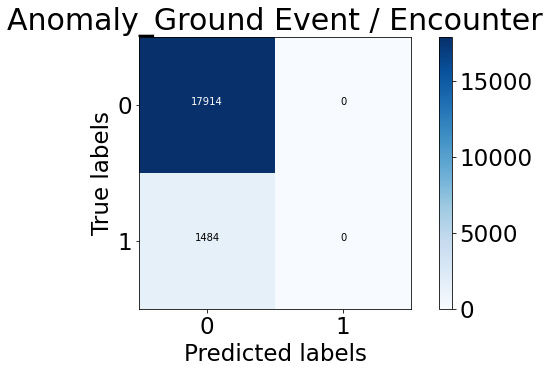

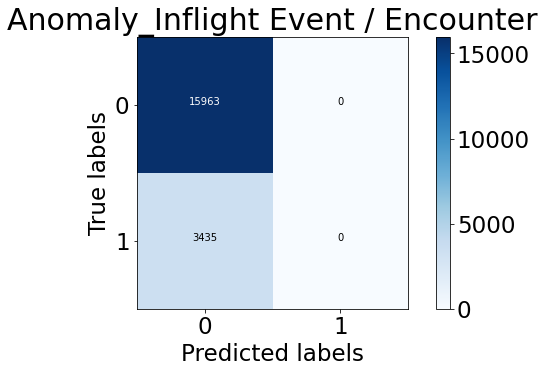

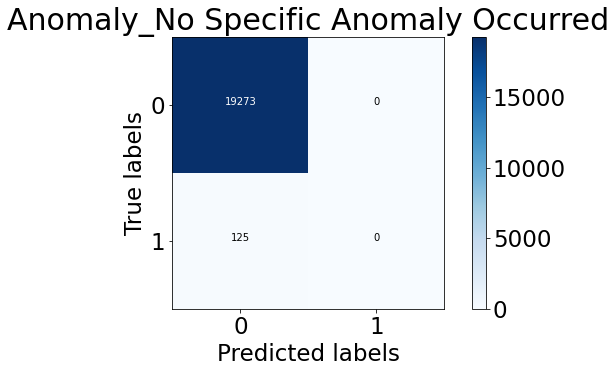

In [118]:
# Confusion matrix for each label, as heatmap
mult_lbl_conf_mat = multilabel_confusion_matrix(y_test, y_pred)
classes = [0,1]
labels = anomalies

for i in range(mult_lbl_conf_mat.shape[0]): # iterate through the amount of classes
  cnf_matrix = mult_lbl_conf_mat[i]

  plt.figure(figsize = (10,5))
  plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
  plt.title(f"{labels[i]}")
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
      plt.text(j, i, cnf_matrix[i, j],
              horizontalalignment = "center",
              color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

  plt.ylabel('True labels')
  plt.xlabel('Predicted labels')
  plt.show()